In [178]:
# Import relevant packages
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import pandas as pd

In [179]:
# Load the data
data = pd.read_csv('data.csv')
# Process the data
for i in range(len(data)):
    if data.iloc[i, 1] == 'M':
        data.iloc[i, 1] = 1
    else:
        data.iloc[i, 1] = 0
# Take a look at the data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [180]:
# Divide the dataset into training and test set
X = np.array(data.iloc[:350, 2:32])
Y = np.array(data.iloc[:350, 1])
X_test = np.array(data.iloc[350:, 2:32])
Y_test = np.array(data.iloc[350:, 1])

# Dimension of training set, 350 observations and 30 independent variables
m = 30
n = 350
# Number of lambdas
N = 100

# Logistic Regression

In [181]:
# Formulate the optimization problem
def logistic(Y, X, m, n, lamb):
    # Define variables
    beta = cp.Variable(m)
    s = cp.Variable(m)
    # Log-likelihood function
    log_likelihood = cp.sum(
        cp.multiply(Y, X @ beta) - cp.logistic(X @ beta)
    )
    # Minimize the negate of the log-likelihood
    objective = cp.Minimize(-log_likelihood/m + lamb * cp.sum(s))
    # Constraints for slack variable
    constraints = [beta <= s, beta >= -s, s >= 0]
    # Formulate the problem
    problem = cp.Problem(objective, constraints)
    
    # Get the optimal value
    return problem.solve(), beta.value

In [182]:
# Predict the labels
def pred(beta, X):
    # Product between X and beta
    ls = X @ beta
    for i in range(len(ls)):
        # Benign if negative
        if ls[i] <= 0:
            ls[i] = 0
        # Malignant if positive
        else:
            ls[i] = 1
    return ls

# Error test
def regression_error(pred, actual):
    # If prediction is wrong, the difference between it and actual label is either -1 or 1
    # Get the percentage of wrong predictions
    return np.sum(np.abs(pred - actual)) / float(np.size(actual))

In [194]:
# Simulation with different lambdas
def logistic_sim(m, n, N, X, Y, X_test, Y_test):
    # Store the results
    error_train = []
    error_test = []
    lambda_ = np.logspace(-2, 0, N)
    beta_vals = []
    outcome_ls = []
    for i in range(N):
        # Run logistic regression
        outcome, beta = logistic(Y, X, m, n, lambda_[i])
        beta_vals.append(beta)
        outcome_ls.append(outcome)
        # Run predictions
        predict_train = pred(beta, X)
        predict_test = pred(beta, X_test)
        # Run accuracy test
        train_err = regression_error(predict_train, Y)
        error_train.append(train_err)
        test_err = regression_error(predict_test, Y_test)
        error_test.append(test_err)
    return beta_vals, outcome_ls, error_train, error_test

In [195]:
beta_vals_log, outcome_ls_log, error_train_log, error_test_log = logistic_sim(m, n, N, X, Y, X_test, Y_test)

In [185]:
print('Training error for the first 20 lambdas: {}'.format(error_train_log[:20]))
print('Test error for the first 20 lambdas: {}'.format(error_test_log[:20]))

Training error for the first 20 lambdas is [0.03428571428571429, 0.03428571428571429, 0.03428571428571429, 0.03428571428571429, 0.037142857142857144, 0.037142857142857144, 0.03428571428571429, 0.03428571428571429, 0.03428571428571429, 0.03428571428571429, 0.03428571428571429, 0.03428571428571429, 0.037142857142857144, 0.037142857142857144, 0.037142857142857144, 0.037142857142857144, 0.037142857142857144, 0.037142857142857144, 0.037142857142857144, 0.037142857142857144]
Test error for the first 20 lambdas is [0.0502283105022831, 0.0502283105022831, 0.0502283105022831, 0.0502283105022831, 0.0502283105022831, 0.0502283105022831, 0.0502283105022831, 0.0502283105022831, 0.0502283105022831, 0.0502283105022831, 0.0502283105022831, 0.0502283105022831, 0.0502283105022831, 0.0502283105022831, 0.045662100456621, 0.045662100456621, 0.045662100456621, 0.045662100456621, 0.045662100456621, 0.045662100456621]


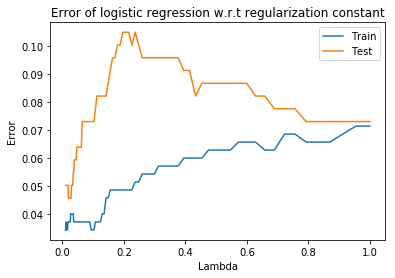

In [196]:
# Error plot w.r.t lambda
lambda_ls = np.logspace(-2, 0, N)
plt.figure()
plt.plot(lambda_ls, error_train_log, label='Train')
plt.plot(lambda_ls, error_test_log, label='Test')
plt.title('Error of logistic regression w.r.t regularization constant')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend()

Text(0,0.5,'Max log-likelihood')

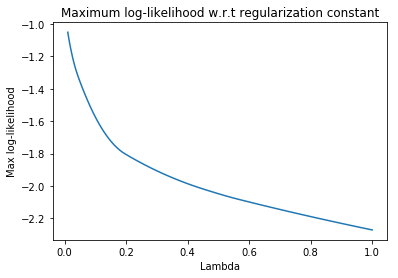

In [201]:
# Maximum log-likelihood w.r.t lambda
plt.figure()
plt.plot(lambda_ls, -np.array(outcome_ls_log))
plt.title('Maximum log-likelihood w.r.t regularization constant')
plt.xlabel('Lambda')
plt.ylabel('Max log-likelihood')

Text(0,0.5,'Value')

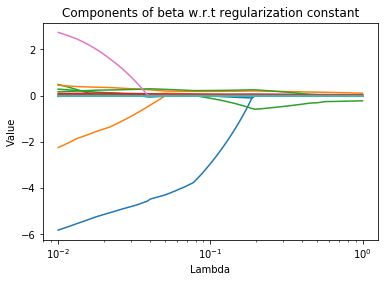

In [193]:
# Beta values w.r.t lambda
plt.figure()
for i in range(m):
    plt.plot(lambda_ls, [each[i] for each in beta_vals_log])
plt.title('Components of beta w.r.t regularization constant')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Value')

# SVM 

In [202]:
# Formulate the optimization problem
def svm(Y, X, m, n, lamb):
    # Define the variables
    beta = cp.Variable((m,1))
    v = cp.Variable()
    s = cp.Variable((m, 1))
    # Loss function
    loss = cp.sum(cp.pos(1 - cp.multiply(Y, X*beta - v)))
    # Minimize loss
    objective = cp.Minimize(loss/n + lamb*cp.sum(s))
    # Constraints for slack variable
    constraints = [beta <= s, beta >= -s, s >= 0]
    # Formulate the problem
    problem = cp.Problem(objective, constraints)
    # Get optimal values
    return problem.solve(), beta.value, v.value

In [203]:
# Predict the labels
def pred_svm(beta, X, v):
    f = X @ beta
    ls = np.array([each[0] for each in f]) - v
    for i in range(len(ls)):
        # Benign if negative
        if ls[i] <= 0:
            ls[i] = -1
        # Malignant if positive
        else:
            ls[i] = 1
    return ls

# Error of SVM
def svm_error(pred, actual):
    actual = [each[0] for each in actual]
    # -1 and 1 are indicators, hence if predict and actual are different, their sum is zero
    return len(np.where(pred + actual == 0)[0]) / float(np.size(actual))

In [204]:
# Simulate SVM with different lambdas
def svm_sim(m, n, N, X, Y, X_test, Y_test):
    # Process data
    for i in range(len(Y_test)):
        if Y_test[i] == 0:
            Y_test[i] = -1
    Y_test = np.array([[each] for each in Y_test])
    for i in range(len(Y)):
        if Y[i] == 0:
            Y[i] = -1
    Y = np.array([[each] for each in Y])
    
    # Store the outcomes
    error_train = []
    error_test = []
    lambda_ = np.logspace(-2, 0, N)
    beta_vals = []
    v_vals = []
    outcome_ls = []
    for i in range(N):
        # Run SVM
        outcome, beta, v = svm(Y, X, m, n, lambda_[i])
        beta_vals.append(beta)
        v_vals.append(v)
        outcome_ls.append(outcome)
        # Run predictions
        predict_train = pred_svm(beta, X, v)
        predict_test = pred_svm(beta, X_test, v)
        # Run error test
        train_err = svm_error(predict_train, Y)
        error_train.append(train_err)
        test_err = svm_error(predict_test, Y_test)
        error_test.append(test_err)
#     actual = [each[0] for each in Y]
    return beta_vals, outcome_ls, error_train, error_test

In [205]:
beta_vals_svm, outcome_ls_svm, error_train_svm, error_test_svm = svm_sim(m, n, 100, X, Y, X_test, Y_test)

In [206]:
print('Training error for the first 20 lambdas: {}'.format(error_train_svm[:20]))
print('Test error for the first 20 lambdas: {}'.format(error_test_svm[:20]))

Training error for the first 20 lambdas: [0.04285714285714286, 0.04285714285714286, 0.04285714285714286, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.037142857142857144, 0.037142857142857144, 0.037142857142857144, 0.037142857142857144, 0.037142857142857144, 0.037142857142857144, 0.037142857142857144]
Test error for the first 20 lambdas: [0.0730593607305936, 0.0730593607305936, 0.0730593607305936, 0.0776255707762557, 0.0776255707762557, 0.0776255707762557, 0.0776255707762557, 0.0776255707762557, 0.0776255707762557, 0.0684931506849315, 0.0684931506849315, 0.0684931506849315, 0.0684931506849315, 0.0684931506849315, 0.0684931506849315, 0.0684931506849315, 0.0684931506849315, 0.0684931506849315, 0.0684931506849315, 0.0684931506849315]


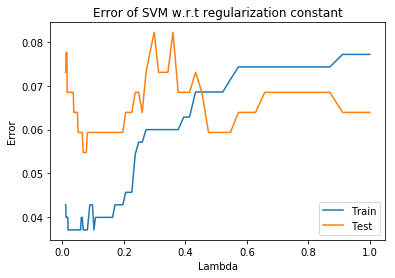

In [207]:
# Error plot w.r.t lambda
lambda_ls = np.logspace(-2, 0, N)
plt.figure()
plt.plot(lambda_ls, error_train_svm, label='Train')
plt.plot(lambda_ls, error_test_svm, label='Test')
plt.title('Error of SVM w.r.t regularization constant')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend()

Text(0,0.5,'Loss')

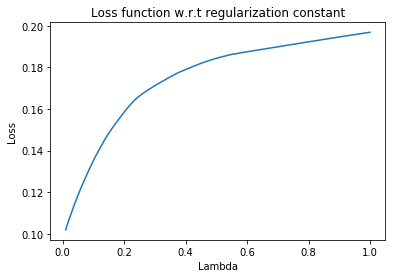

In [209]:
# Loss function w.r.t lambda
plt.figure()
plt.plot(lambda_ls, outcome_ls_svm)
plt.title('Loss function w.r.t regularization constant')
plt.xlabel('Lambda')
plt.ylabel('Loss')

Text(0,0.5,'Value')

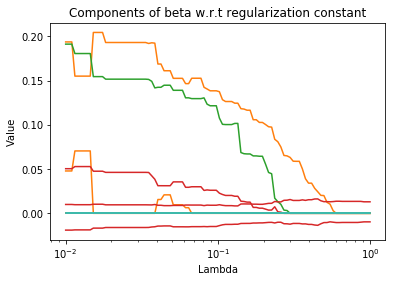

In [210]:
# Beta values w.r.t lambda
plt.figure()
for i in range(m):
    plt.plot(lambda_ls, [each[i] for each in beta_vals_svm])
plt.title('Components of beta w.r.t regularization constant')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Value')